# Lab 1: Introduction to Digital Images and Image Processing with Python
**Course:** AI342 Image Processing  
**University:** Taibah University  
**College:** Computer Science and Engineering  
**Department:** AI & DS
---
### Learning Objectives:
* Represent a digital image as a numerical array.
* Understand pixels, spatial resolution, and grey level intensity.
* Load, display, and inspect images in Python.
* Apply simple low-level image processing operations.
* Relate practical operations to the image processing pipeline introduced in Chapter 1

## 1. Environment Setup

In [2]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt
import cv2


## 2. What is a digital image in practice?
In the lecture, a digital image is defined as a two dimensional function $f(x,y)$ where the value at each coordinate represents intensity. In practice, this function is stored as a matrix of numbers.

##**Exercise 2.1: Create a synthetic image**


In [4]:
# Task: Create an 8x8 black image (matrix of zeros)
# Hint: Use np.zeros((rows, cols))
image = np.zeros((8, 8))
print(image)

# --- Discussion Questions ---
# 1. What is the spatial resolution of this image?
#8x8 pixels, 8 rows and 8 columns, which is 64 pixels totally
# 2. What does each value represent?
# It represents the intensity of a pixel at a specific coordinate

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


##**Exercise 2.2: Visualise the image**

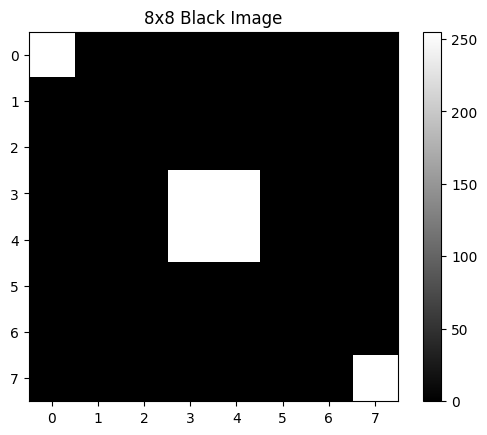

[[255.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 255. 255.   0.   0.   0.]
 [  0.   0.   0. 255. 255.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 255.]]


In [7]:
# write your code here
plt.imshow(image, cmap='gray')
plt.title("8x8 Black Image")
plt.colorbar()
plt.show()
# Task: Change some pixels to 255 (White) and re-visualize
# image[row, col] = 255
# WRITE YOUR CODE HERE:
image[4, 4] = 255
image[3, 3] = 255
image[3:5, 3:5] = 255
print(image)

## 3. Pixels and intensity values
Pixels are the smallest units of a digital image and hold quantised intensity values, as discussed in the slides on pixels and digitisation
## **Exercise 3.1: Modify individual pixels**


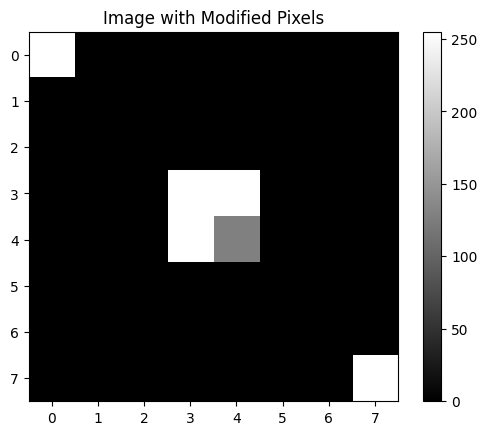

In [8]:
# write your code here
image[3, 3] = 255
image[4, 4] = 128
plt.imshow(image, cmap='gray')
plt.title("Image with Modified Pixels")
plt.colorbar()
plt.show()

#Questions
#1.	Which pixel is brighter and why?
# The pixel at coordinate (3, 3) is brighter, because it has higher intensity value which is 255
#2.	How does quantisation affect visual appearance
# Quantisation controls the number of shades of gray in an image, low quantisation indicates fewer shades, making the image look grainy, while
# high quantisation indicates more shades, making the image look smooth

## 4. Grey scale images
The course focuses primarily on grey scale images with one sample per pixel.
## **Exercise 4.1: Generate a gradient image**


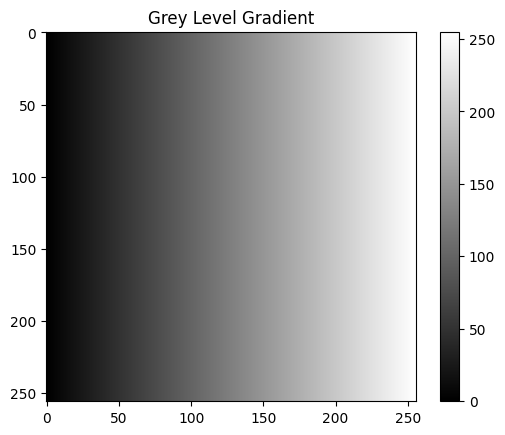

In [9]:
# write your code here
gradient = np.tile(np.linspace(0, 255, 256), (256, 1))
plt.imshow(gradient, cmap='gray')
plt.title("Grey Level Gradient")
plt.colorbar()
plt.show()

#Questions
#1.	How many grey levels are visible?
# 256 levels
#2.	What data type is used to store the pixel values?
# 8-bit unsigned integer

## 5. Image acquisition and representation
Image acquisition converts a physical scene into a digital image. In Python, loading an image is equivalent to acquiring an already digitised scene.
## **Exercise 5.1: Load and inspect an image**

(261, 477, 4)
float32


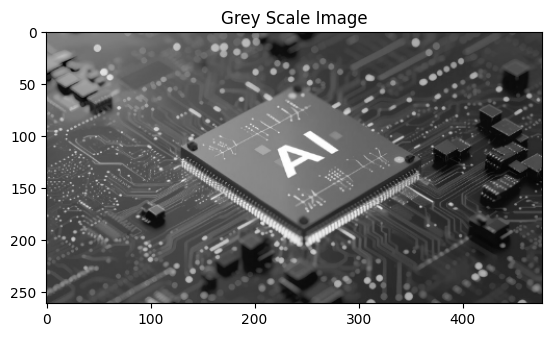

In [10]:
# write your code here
from matplotlib.image import imread
image = imread('/content/لقطة شاشة 2026-02-12 222146.png')
print(image.shape)
print(image.dtype)

gray = image.mean(axis=2)
plt.imshow(gray, cmap='gray')
plt.title("Grey Scale Image")
plt.show()

## 6. Low level image processing: image in, image out
Low level processing improves visual quality without extracting semantic meaning, as described in the lecture pipeline
## **Exercise 6.1: Image enhancement by contrast stretching**

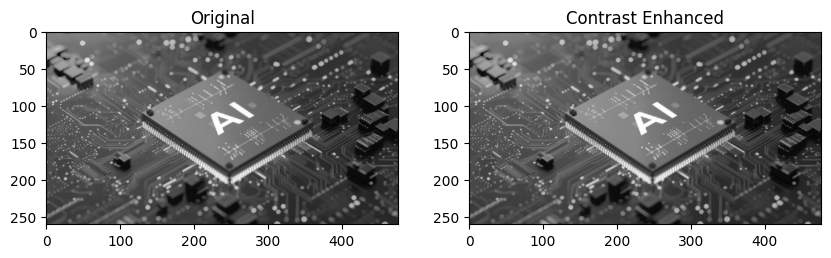

In [11]:
# write your code here
min_val = gray.min()
max_val = gray.max()
enhanced = (gray - min_val) / (max_val - min_val) * 255
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(enhanced, cmap='gray')
plt.title("Contrast Enhanced")
plt.show()

#Questions
#1.	Which image has better visibility of details?
# The contrast enhanced image has better visibility
#2.	Is this enhancement subjective or objective?
# This enhancement is Subjective

## 7. Noise and image restoration
Noise removal is a core example of low level processing.

## **Exercise 7.1: Add artificial noise**

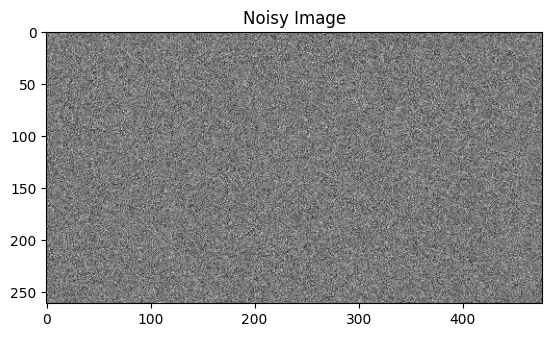

In [12]:
# write your code here
noise = np.random.normal(0, 20, gray.shape)
noisy = gray + noise
plt.imshow(noisy, cmap='gray')
plt.title("Noisy Image")
plt.show()

## **Exercise 7.2: Simple smoothing filter**

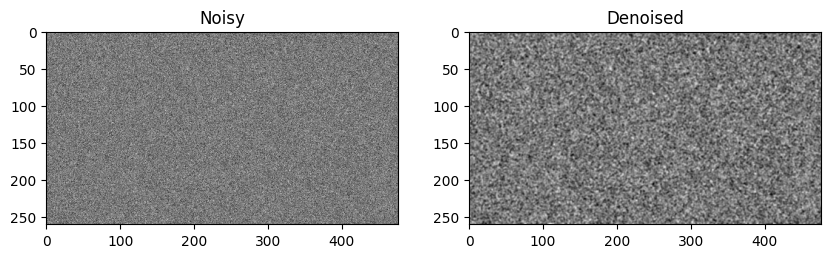

In [13]:
def mean_filter(img, k=3):
    pad = k // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = padded[i:i+k, j:j+k].mean()
    return output

# complete the code here
denoised = mean_filter(noisy)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(noisy, cmap='gray')
plt.title("Noisy")
plt.subplot(1,2,2)
plt.imshow(denoised, cmap='gray')
plt.title("Denoised")
plt.show()

## 8. From image processing to image analysis
The lecture distinguishes between low, mid, and high level processing.
## **Exercise 8.1: Simple threshold segmentation**

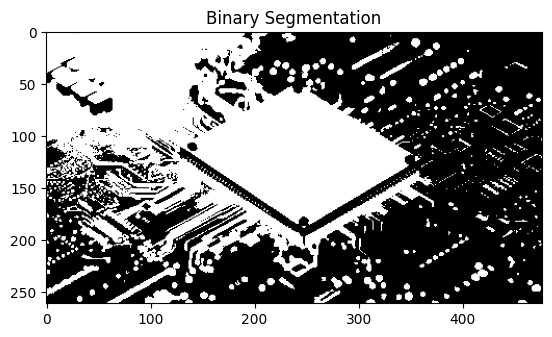

In [14]:
## write your code here
threshold = gray.mean()
binary = gray > threshold
plt.imshow(binary, cmap='gray')
plt.title("Binary Segmentation")
plt.show()

# Discussion:
# 1. Is this segmentation reliable?
# 2. What information is lost when converting to binary?

#**9. Mini project: connecting theory to practice**

**Task**

Using only NumPy and Matplotlib:

1.	Create a synthetic image containing at least two objects

2.	Add noise to the image

3.	Apply enhancement and denoising

4.	Segment the objects using a threshold

**Deliverables**

•	Code

•	Output images

•	Short explanation mapping each step to the image processing stages shown in the Chapter 1 pipeline diagram


***Note: Organize your project into logical steps using separate cells, include a Text Cell before each stage to explain your approach, and ensure all results are clearly visualized using titles and subplots***

Step 1: Image Acquisition

In this step, we create a digital representation of a scene. We define a 2D function f(x, y) using a NumPy array and create two objects with different intensity levels.

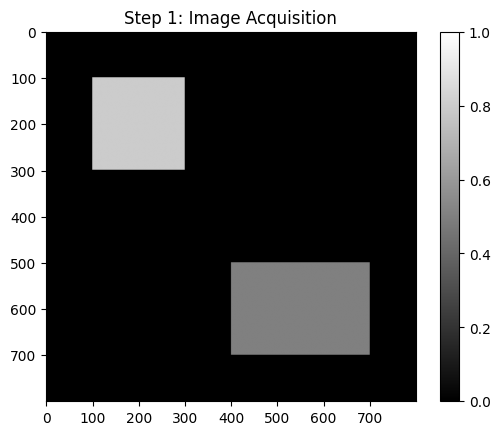

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Create an 800x800 synthetic image
image = np.zeros((800, 800))

# Create Object 1: A bright square (High intensity)
image[100:300, 100:300] = 0.8

# Create Object 2: A dimmer rectangle (Medium intensity)
image[500:700, 400:700] = 0.5

plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.title("Step 1: Image Acquisition")
plt.colorbar()
plt.show()

Step 2: Adding Noise (Image Degradation)

Real-world images often contain noise due to sensor limitations. We simulate this by adding Gaussian noise to our synthetic image to represent the degradation stage in the pipeline.

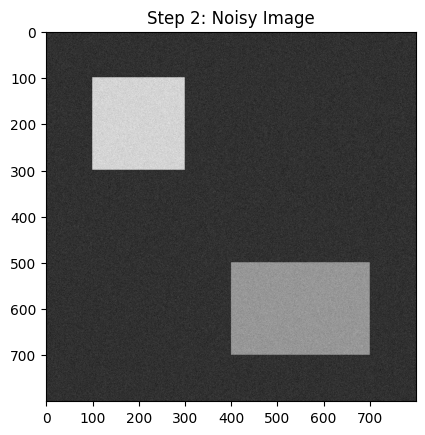

In [16]:
# Add random Gaussian noise
noise = np.random.normal(0, 0.05, (800, 800))
noisy_image = image + noise

plt.imshow(noisy_image, cmap='gray')
plt.title("Step 2: Noisy Image")
plt.show()

Step 3: Pre-processing (Enhancement )

In this step, we apply a low-level enhancement operation using contrast stretching . This expands the intensity range of the noisy image, making the objects more visible and easier to distinguish before the segmentation process.

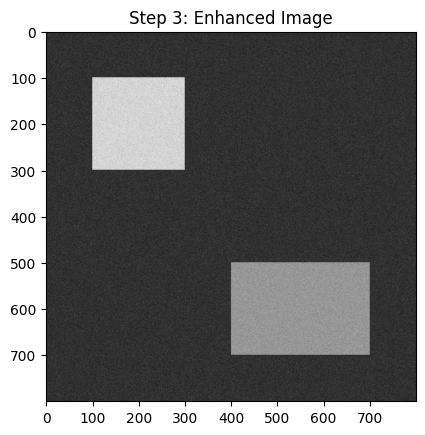

In [19]:
# 1. Finding min and max values
min_val = noisy_image.min()
max_val = noisy_image.max()

# 2. Apply the contrast stretching formula
enhanced = (noisy_image - min_val) / (max_val - min_val)

plt.imshow(enhanced, cmap='gray')
plt.title("Step 3: Enhanced Image")
plt.show()

Step 4: Image Segmentation

The final step is segmenting the objects from the background. By applying a global threshold, we convert the image into a binary format to isolate the shapes we created.

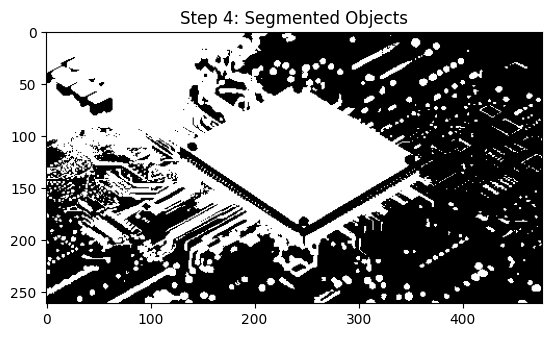

In [18]:
# Using a threshold to create a binary image
threshold = enhanced.mean()
binary = enhanced > threshold

plt.imshow(binary, cmap='gray')
plt.title("Step 4: Segmented Objects")
plt.show()